In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Trapezoidal Rule

In [2]:
def trapezoidal_rule(f, a, b, n):

    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    y = np.array([f(xi) for xi in x])
    
    # Trapezoidal rule formula
    integral = h * (0.5 * y[0] + np.sum(y[1:-1]) + 0.5 * y[-1])
    return integral

## MSE

In [3]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [4]:
def generate_data(n=100):
    np.random.seed(42)
    x = np.linspace(-2, 2, n)
    y = 3 * x**2 + 2 * x + 1 + np.random.normal(0, 0.5, n)
    return x, y

In [5]:
def predict(x, w0, w1, w2):
    return w0 + w1 * x + w2 * x**2

In [6]:
def loss_function(w1, x_data, y_data, w0=1, w2=3):
    y_pred = predict(x_data, w0, w1, w2)
    return mean_squared_error(y_data, y_pred)

## Ploting the Graph

=== Trapezoidal Rule for Loss Function Approximation ===

Generated 100 data points

Trapezoidal Rule Approximations:
Intervals | Integral Approximation
-----------------------------------
      10 |           8.227172
      50 |           8.087880
     100 |           8.083527
     200 |           8.082439

Optimal w1: 2.0180
Minimum loss: 0.206423
Average loss over interval [0, 4]: 2.020610


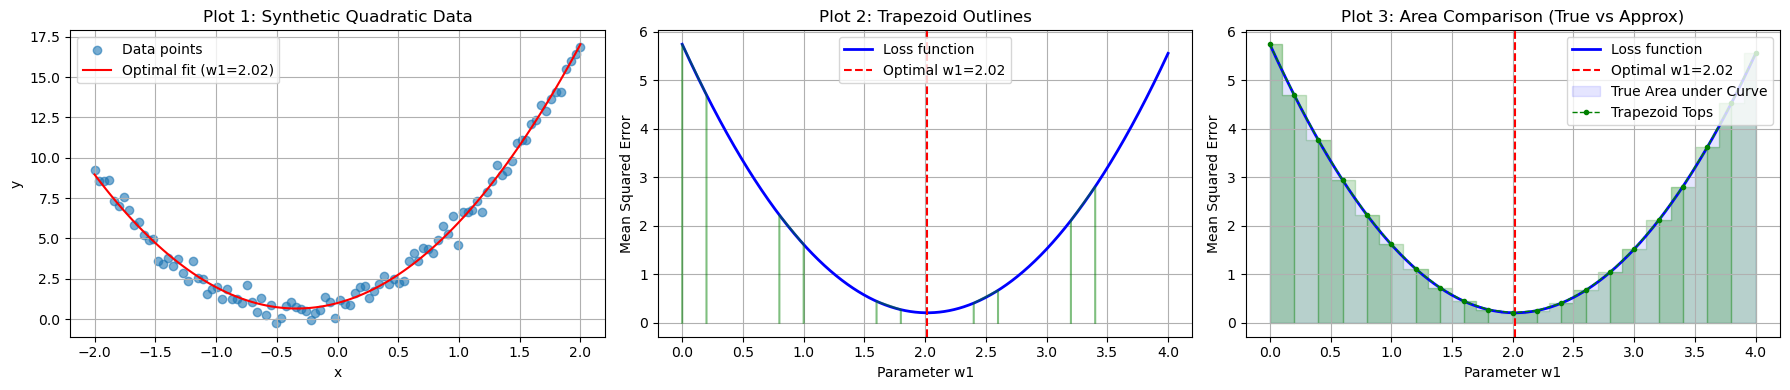


Integral of loss function from 0 to 4: 8.082439


<Figure size 640x480 with 0 Axes>

In [7]:
def main():
    print("=== Trapezoidal Rule for Loss Function Approximation ===\n")
    
    
    x_data, y_data = generate_data()
    print(f"Generated {len(x_data)} data points")
    
    w1_min, w1_max = 0, 4  # Range for w1 parameter
    
    
    def loss_for_integration(w1):
        return loss_function(w1, x_data, y_data)
    
    # Apply trapezoidal rule with different numbers of intervals
    n_intervals = [10, 50, 100, 200]
    print("\nTrapezoidal Rule Approximations:")
    print("Intervals | Integral Approximation")
    print("-" * 35)
    
    approximations = []
    for n in n_intervals:
        approx = trapezoidal_rule(loss_for_integration, w1_min, w1_max, n)
        approximations.append(approx)
        print(f"{n:8d} | {approx:18.6f}")
    
    
    w1_range = np.linspace(w1_min, w1_max, 1000)
    losses = [loss_for_integration(w1) for w1 in w1_range]
    optimal_w1 = w1_range[np.argmin(losses)]
    min_loss = min(losses)
    
    print(f"\nOptimal w1: {optimal_w1:.4f}")
    print(f"Minimum loss: {min_loss:.6f}")
    print(f"Average loss over interval [{w1_min}, {w1_max}]: {approximations[-1]/(w1_max-w1_min):.6f}")
    
       
    plt.figure(figsize=(18, 4))

    # === Plot 1: Original data and fitted curve ===
    plt.subplot(1, 3, 1)
    plt.scatter(x_data, y_data, alpha=0.6, label='Data points')
    x_smooth = np.linspace(-2, 2, 100)
    y_optimal = predict(x_smooth, 1, optimal_w1, 3)
    plt.plot(x_smooth, y_optimal, 'r-', label=f'Optimal fit (w1={optimal_w1:.2f})')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Plot 1: Synthetic Quadratic Data')
    plt.legend()
    plt.grid(True)

    
    plt.subplot(1, 3, 2)
    plt.plot(w1_range, losses, 'b-', linewidth=2, label='Loss function')
    plt.axvline(optimal_w1, color='r', linestyle='--', label=f'Optimal w1={optimal_w1:.2f}')

   
    n_viz = 20
    x_trap = np.linspace(w1_min, w1_max, n_viz + 1)
    y_trap = [loss_for_integration(x) for x in x_trap]
    for i in range(n_viz):
        if i % 4 == 0: 
            plt.plot([x_trap[i], x_trap[i], x_trap[i+1], x_trap[i+1]],
                     [0, y_trap[i], y_trap[i+1], 0], 'g-', alpha=0.5)
    plt.xlabel('Parameter w1')
    plt.ylabel('Mean Squared Error')
    plt.title('Plot 2: Trapezoid Outlines')
    plt.legend()
    plt.grid(True)

    
    plt.subplot(1, 3, 3)
    plt.plot(w1_range, losses, 'b-', linewidth=2, label='Loss function')
    plt.axvline(optimal_w1, color='r', linestyle='--', label=f'Optimal w1={optimal_w1:.2f}')
    plt.fill_between(w1_range, losses, color='blue', alpha=0.1, label='True Area under Curve')

    
    for i in range(n_viz):
        xs = [x_trap[i], x_trap[i+1]]
        ys = [y_trap[i], y_trap[i+1]]
        plt.fill_between(xs, ys, color='green', alpha=0.3 if i % 2 == 0 else 0.2, step='mid')
    plt.plot(x_trap, y_trap, 'go--', linewidth=1, markersize=3, label='Trapezoid Tops')

    plt.xlabel('Parameter w1')
    plt.ylabel('Mean Squared Error')
    plt.title('Plot 3: Area Comparison (True vs Approx)')
    plt.legend(loc='upper right')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    
    plt.tight_layout()   
    
    print(f"\nIntegral of loss function from {w1_min} to {w1_max}: {approximations[-1]:.6f}")

if __name__ == "__main__":
    main()